## Data Exploration

In [1]:
%%capture
#Load data_preparation_and_preprocessing file
%run data_preparation_and_preprocessing.ipynb

In [2]:
#Check for statistics
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [3]:
#Get the correlation matrix
corr_matrix = dataset.corr()

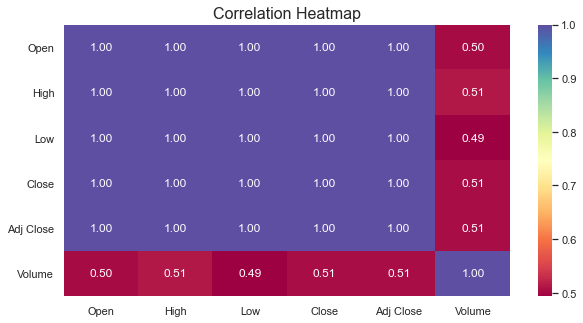

In [89]:
#Get the correlation heatmap
#Get the image size
plt.figure(figsize=(10, 5))
#Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="Spectral", fmt=".2f")
#Add a title
plt.title("Correlation Heatmap", fontsize=16)
# Display the plot
plt.show()

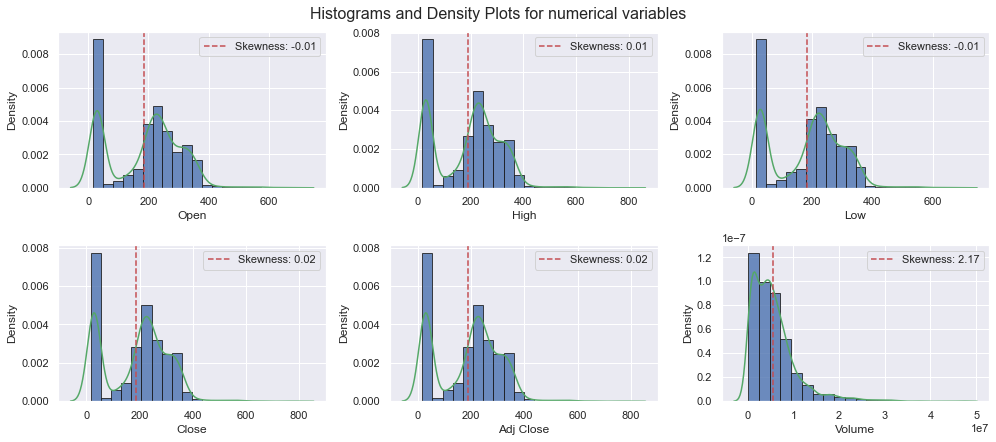

In [51]:
#Plot histograms
plt.figure(figsize=(14, 6)) 

#Loop through variables
for i, column in enumerate(dataset.columns[1:], 1):
    plt.subplot(2, 3, i)
    plt.hist(dataset[column], bins=20, edgecolor="k", alpha=0.8, density=True)
    sns.kdeplot(dataset[column], color="g")
    plt.xlabel(column)
    plt.ylabel("Density")
    
    #Calculate and display skewness
    skewness = dataset[column].skew()
    plt.axvline(x=dataset[column].mean(), color="r", linestyle="--", label=f"Skewness: {skewness:.2f}")
    plt.legend()

plt.tight_layout()
plt.suptitle("Histograms and Density Plots for numerical variables", fontsize=16, y=1.02)
plt.show()

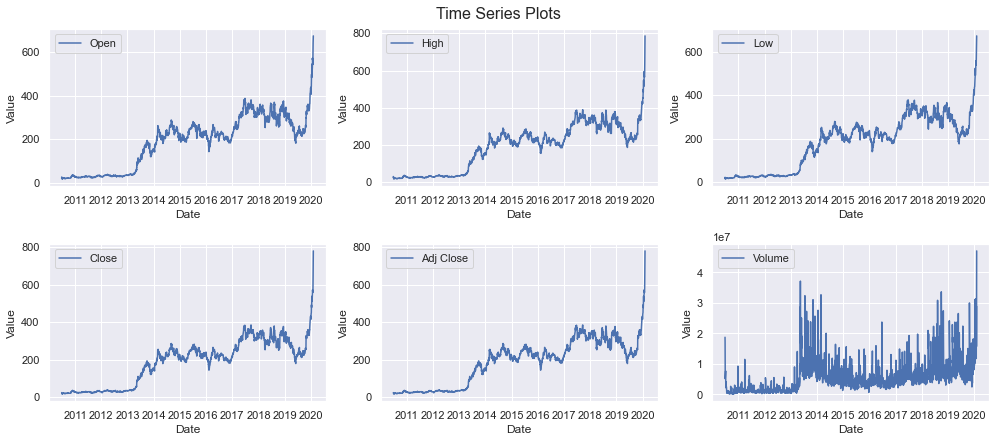

In [59]:
#Plot time series plot
plt.figure(figsize=(14, 6)) 

#Loop through variables
for i, column in enumerate(dataset.columns[1:], 1):
    plt.subplot(2, 3, i)
    plt.plot(dataset["Date"], dataset[column], label=column)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()

plt.tight_layout()
plt.suptitle("Time Series Plots", fontsize=16, y=1.02)
plt.show()

##### Calculate daily returns

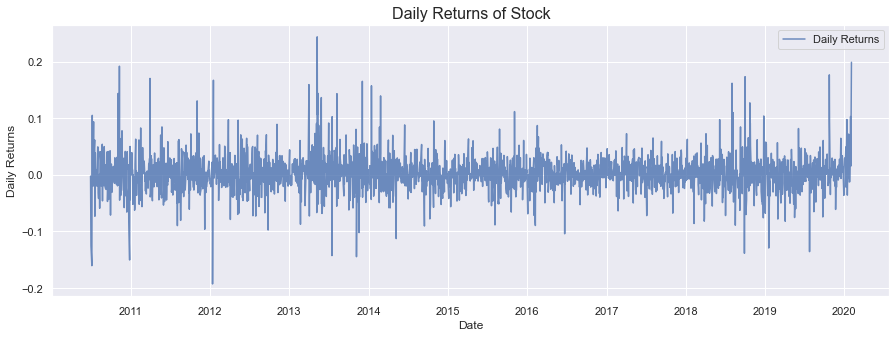

In [86]:
#Calculate and plot daily returns using adj close variable
plt.figure(figsize=(15, 5))
plt.plot(dataset["Date"], dataset["Adj Close"].pct_change(), label="Daily Returns", alpha=0.8)
#Titles
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("Daily Returns of Stock", fontsize=16)
plt.legend()
plt.show()

##### Calculate moving averages for 50 and 200 days 

In [72]:
#Calculate moving averages for 50 and 200 days
dataset["MA_50"] = dataset["Adj Close"].rolling(window=50).mean()
dataset["MA_200"] = dataset["Adj Close"].rolling(window=200).mean()

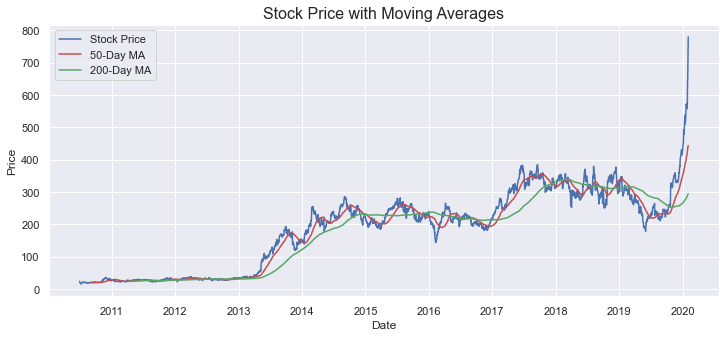

In [87]:
#plot moving averages
plt.figure(figsize=(12, 5))
#Plot adj close variable alongside moving averages  
plt.plot(dataset["Date"], dataset["Adj Close"], label="Stock Price", color="b")
plt.plot(dataset["Date"], dataset["MA_50"], label="50-Day MA", color="r")
plt.plot(dataset["Date"], dataset["MA_200"], label="200-Day MA", color="g")
#Titles
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price with Moving Averages", fontsize=16)
plt.legend()
plt.show()

##### Analyze trading volume 

In [75]:
#Analyze trading volume
dataset["50-day MA"] = dataset["Volume"].rolling(window=50).mean()
dataset["200-day MA"] = dataset["Volume"].rolling(window=200).mean()

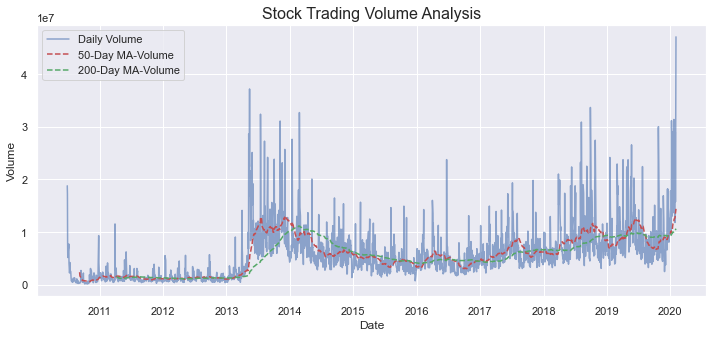

In [88]:
#plot moving averages
plt.figure(figsize=(12, 5))
#Plot Volume variable alongside moving averages  
plt.plot(dataset["Date"], dataset["Volume"], label="Daily Volume", color="b", alpha=0.6)
plt.plot(dataset["Date"], dataset["50-day MA"], label="50-Day MA-Volume", color="r", linestyle="--")
plt.plot(dataset["Date"], dataset["200-day MA"], label="200-Day MA-Volume", color="g", linestyle="--")
#Titles
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Stock Trading Volume Analysis", fontsize=16)
plt.legend()
plt.show()

##### Volatility Analysis

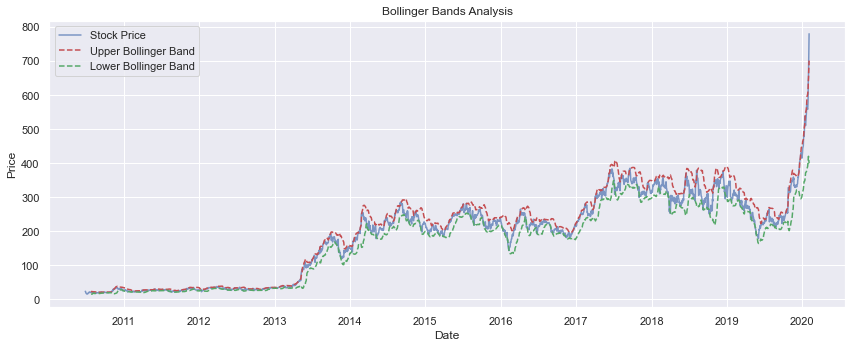

In [94]:
#Volatility Analysis
dataset["20-day SMA"] = dataset["Adj Close"].rolling(window=20).mean()
#Calculate standard deviation for 20 day rolling
dataset["20-day StdDev"] = dataset["Adj Close"].rolling(window=20).std()

#Calculate the upper and lower Bollinger Bands
dataset["Upper Bollinger"] = dataset["20-day SMA"] + (2 * dataset["20-day StdDev"])
dataset["Lower Bollinger"] = dataset["20-day SMA"] - (2 * dataset["20-day StdDev"])

#Create a plot
plt.figure(figsize=(12, 5))
plt.plot(dataset["Date"], dataset["Adj Close"], label="Stock Price", alpha=0.7)
plt.plot(dataset["Date"], dataset["Upper Bollinger"], label="Upper Bollinger Band", color="r", linestyle="--")
plt.plot(dataset["Date"], dataset["Lower Bollinger"], label="Lower Bollinger Band", color="g", linestyle="--")
#Titles
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bollinger Bands Analysis")
plt.legend()
plt.tight_layout()
plt.show()